In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict

In [3]:
load_dotenv()

True

In [13]:
# Define Model
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [14]:
# Define State
class BlogState(TypedDict):

    topic: str
    outline: str
    content: str

In [15]:
def create_outline(state: BlogState) -> BlogState:

    # Extract topic
    topic = state['topic']

    # Create prompt
    prompt = f"Generate a outline for the topic - {topic}"

    # Generate outline
    outline = model.invoke(prompt)

    # Update State
    state['outline'] = outline

    return state

In [16]:
def create_blog(state: BlogState) -> BlogState:

    # Extract topic and outline
    topic = state['topic']
    outline = state['outline']

    # Create prompt
    prompt = f"Generate a blog for the topic - {topic} with the outline given below\n{outline}"

    # Generate blog
    content = model.invoke(prompt)

    # Update State
    state['content'] = content

    return state

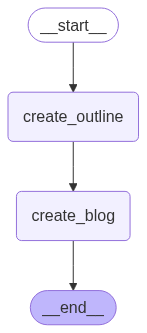

In [17]:
# Define graph
graph = StateGraph(BlogState)

# Add nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# Add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

# Compile workflow
workflow = graph.compile()
workflow

In [18]:
# Define initial State
topic = "What is transformer architecture in AI?"

initial_state = {
    'topic': topic,
    'outline': "",
    'content': ""
}

# Execute workflow
final_state = workflow.invoke(initial_state)

print(final_state['content'])

content='## The Transformer Architecture: Revolutionizing AI with Self-Attention\n\n**I. Introduction**\n\n*   **A. Hook:** The Transformer architecture has fundamentally reshaped the landscape of artificial intelligence, driving breakthroughs in fields ranging from natural language processing to computer vision with unprecedented accuracy and efficiency.\n*   **B. Context:** Before Transformers, Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs) were the dominant architectures for sequential data processing. However, they suffered from limitations such as difficulty in parallelization and capturing long-range dependencies.\n*   **C. Thesis Statement:** The transformer architecture is a neural network architecture that relies on self-attention mechanisms to process sequential data in parallel, overcoming limitations of previous architectures and achieving state-of-the-art performance in various AI tasks.\n*   **D. Outline Preview:** This blog post will delve into